In [2]:
import pandas as pd
import numpy as np 

Perfil eleitor

In [42]:
df_perfil_inicio = pd.read_csv("perfil_eleitor_secao_2020_RS.csv",  encoding="latin1", delimiter=";")
df_perfil_inicio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281617 entries, 0 to 4281616
Data columns (total 23 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRICA       int64 
 7   DS_MUN_SIT_BIOMETRICA       object
 8   NR_ZONA                     int64 
 9   NR_SECAO                    int64 
 10  NR_LOCAL_VOTACAO            int64 
 11  CD_GENERO                   int64 
 12  DS_GENERO                   object
 13  CD_ESTADO_CIVIL             int64 
 14  DS_ESTADO_CIVIL             object
 15  CD_FAIXA_ETARIA             int64 
 16  DS_FAIXA_ETARIA             object
 17  CD_GRAU_ESCOLARIDADE        int64 
 18  DS_GRAU_ESCOLARIDADE        object
 19  QT_ELEITORES_PERFIL         int64 
 20  QT

In [43]:
df_perfil_reduzido = df_perfil_inicio[['CD_MUNICIPIO', 'NR_ZONA', 'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL']]

df_perfil = df_perfil_reduzido.groupby(['CD_MUNICIPIO', 'NR_ZONA', 'DS_GRAU_ESCOLARIDADE']).sum().reset_index()

df_perfil.head()


,CD_MUNICIPIO,NR_ZONA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL
0,84735,3,ANALFABETO,28
1,84735,3,ENSINO FUNDAMENTAL COMPLETO,250
2,84735,3,ENSINO FUNDAMENTAL INCOMPLETO,1431
3,84735,3,ENSINO MÉDIO COMPLETO,593
4,84735,3,ENSINO MÉDIO INCOMPLETO,307


Votação Partido Município Zona

In [44]:
df_votos_inicio = pd.read_csv("votacao_partido_munzona_2020_RS.csv", encoding="latin1", delimiter=";")
df_votos_inicio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5173 entries, 0 to 5172
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   DT_GERACAO                      5173 non-null   object
 1   HH_GERACAO                      5173 non-null   object
 2   ANO_ELEICAO                     5173 non-null   int64 
 3   CD_TIPO_ELEICAO                 5173 non-null   int64 
 4   NM_TIPO_ELEICAO                 5173 non-null   object
 5   NR_TURNO                        5173 non-null   int64 
 6   CD_ELEICAO                      5173 non-null   int64 
 7   DS_ELEICAO                      5173 non-null   object
 8   DT_ELEICAO                      5173 non-null   object
 9   TP_ABRANGENCIA_ELEICAO          5173 non-null   object
 10  SG_UF                           5173 non-null   object
 11  SG_UE                           5173 non-null   int64 
 12  NM_UE                           5173 non-null   

In [45]:
df_votos_primeiro_turno = df_votos_inicio[df_votos_inicio['NR_TURNO'] == 1]

df_votos_reduzido = df_votos_primeiro_turno[['NR_TURNO', 'NM_PARTIDO', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
                              'QT_VOTOS_LEGENDA_VALIDOS', 'QT_VOTOS_NOM_CONVR_LEG_VALIDOS', 
                              'QT_TOTAL_VOTOS_LEG_VALIDOS', 'QT_VOTOS_NOMINAIS_VALIDOS']]

df_votos_reduzido['QT_TOTAL_VOTOS'] = (
    df_votos_reduzido['QT_VOTOS_LEGENDA_VALIDOS'] + 
    df_votos_reduzido['QT_VOTOS_NOM_CONVR_LEG_VALIDOS'] +
    df_votos_reduzido['QT_TOTAL_VOTOS_LEG_VALIDOS'] +
    df_votos_reduzido['QT_VOTOS_NOMINAIS_VALIDOS']
)

df_votos = df_votos_reduzido[['NM_PARTIDO', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'QT_TOTAL_VOTOS']]

print(df_votos.head())


                                NM_PARTIDO  CD_MUNICIPIO      NM_MUNICIPIO  \
0         Movimento Democrático Brasileiro         86223             BARÃO   
1  Partido da Social Democracia Brasileira         85871           CANGUÇU   
2                            PROGRESSISTAS         89591       VERANÓPOLIS   
3           Partido Socialismo e Liberdade         86835          GRAVATAÍ   
4                            PROGRESSISTAS         85561  SALDANHA MARINHO   

   NR_ZONA  QT_TOTAL_VOTOS  
0      152             736  
1       14            2055  
2       88            1733  
3      173            1634  
4      115            1233  


C:\Users\User\AppData\Local\Temp\ipykernel_21492\485758548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_votos_reduzido['QT_TOTAL_VOTOS'] = (


Juntando datasets

In [46]:
df = pd.merge(df_perfil, df_votos, 
              on=['CD_MUNICIPIO', 'NR_ZONA'], 
              how='inner')

df.head()

,CD_MUNICIPIO,NR_ZONA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,NM_PARTIDO,NM_MUNICIPIO,QT_TOTAL_VOTOS
0,84735,3,ANALFABETO,28,PROGRESSISTAS,ÁUREA,856
1,84735,3,ANALFABETO,28,Partido Liberal,ÁUREA,528
2,84735,3,ANALFABETO,28,REPUBLICANOS,ÁUREA,209
3,84735,3,ANALFABETO,28,Movimento Democrático Brasileiro,ÁUREA,345
4,84735,3,ANALFABETO,28,Partido Trabalhista Brasileiro,ÁUREA,484


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42547 entries, 0 to 42563
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CD_MUNICIPIO          42547 non-null  int64 
 1   NR_ZONA               42547 non-null  int64 
 2   DS_GRAU_ESCOLARIDADE  42547 non-null  object
 3   QT_ELEITORES_PERFIL   42547 non-null  int64 
 4   NM_PARTIDO            42547 non-null  object
 5   NM_MUNICIPIO          42547 non-null  object
 6   QT_TOTAL_VOTOS        42547 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.6+ MB


Iniciando limpeza

In [47]:
df.isnull().sum()

CD_MUNICIPIO            0
NR_ZONA                 0
DS_GRAU_ESCOLARIDADE    0
QT_ELEITORES_PERFIL     0
NM_PARTIDO              0
NM_MUNICIPIO            0
QT_TOTAL_VOTOS          0
dtype: int64

In [48]:
duplicados = df.duplicated().value_counts()
print(duplicados)

False    42547
True        17
Name: count, dtype: int64


In [52]:
df_duplicated = df[df.duplicated(keep=False)]
df_duplicated.head(10)


,CD_MUNICIPIO,NR_ZONA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,NM_PARTIDO,NM_MUNICIPIO,QT_TOTAL_VOTOS


In [ ]:
df.drop_duplicates(inplace=True)

In [54]:
votos_negativos = (df['QT_TOTAL_VOTOS'] < 0).sum()
print(votos_negativos)

0


In [23]:
# df.to_csv('dados_eleitores.csv', index=False, encoding='utf-8')
df = pd.read_csv("dados_eleitores.csv")

Inicio Analise

In [24]:
contagem_partidos = df['NM_PARTIDO'].nunique()
print(f"Total de partidos: {contagem_partidos}")

Total de partidos: 31


In [25]:
contagem_cidades = df['NM_MUNICIPIO'].nunique()
print(f"Total de cidades: {contagem_cidades}")

Total de cidades: 497


In [26]:
votos_por_partido = df.groupby('NM_PARTIDO')['QT_TOTAL_VOTOS'].sum().reset_index().sort_values(by='QT_TOTAL_VOTOS', ascending=False)
print(votos_por_partido)

                                        NM_PARTIDO  QT_TOTAL_VOTOS
5                                    PROGRESSISTAS        18555589
4                 Movimento Democrático Brasileiro        18330470
8                  Partido Democrático Trabalhista        11696250
24                       Partido dos Trabalhadores         9393931
23         Partido da Social Democracia Brasileira         8931861
19                  Partido Trabalhista Brasileiro         6672320
17                   Partido Socialista Brasileiro         4913104
14                      Partido Social Democrático         3642748
27                                    REPUBLICANOS         3626081
3                                       Democratas         3052208
7                      Partido Comunista do Brasil         2658971
9                                  Partido Liberal         2369951
15                          Partido Social Liberal         1673785
16                  Partido Socialismo e Liberdade         139

In [27]:
contagem_educacao = df.groupby('DS_GRAU_ESCOLARIDADE')['QT_ELEITORES_PERFIL'].sum().reset_index()

print("Contagem de eleitores por grau de escolaridade:")
print(contagem_educacao.sort_values(by='QT_ELEITORES_PERFIL', ascending=False))

Contagem de eleitores por grau de escolaridade:
            DS_GRAU_ESCOLARIDADE  QT_ELEITORES_PERFIL
2  ENSINO FUNDAMENTAL INCOMPLETO             45269260
3          ENSINO MÉDIO COMPLETO             37782836
4        ENSINO MÉDIO INCOMPLETO             28002477
7              SUPERIOR COMPLETO             19791328
1    ENSINO FUNDAMENTAL COMPLETO             16068109
8            SUPERIOR INCOMPLETO             13519396
5                   LÊ E ESCREVE              4755123
0                     ANALFABETO              2814638
6                  NÃO INFORMADO                35765


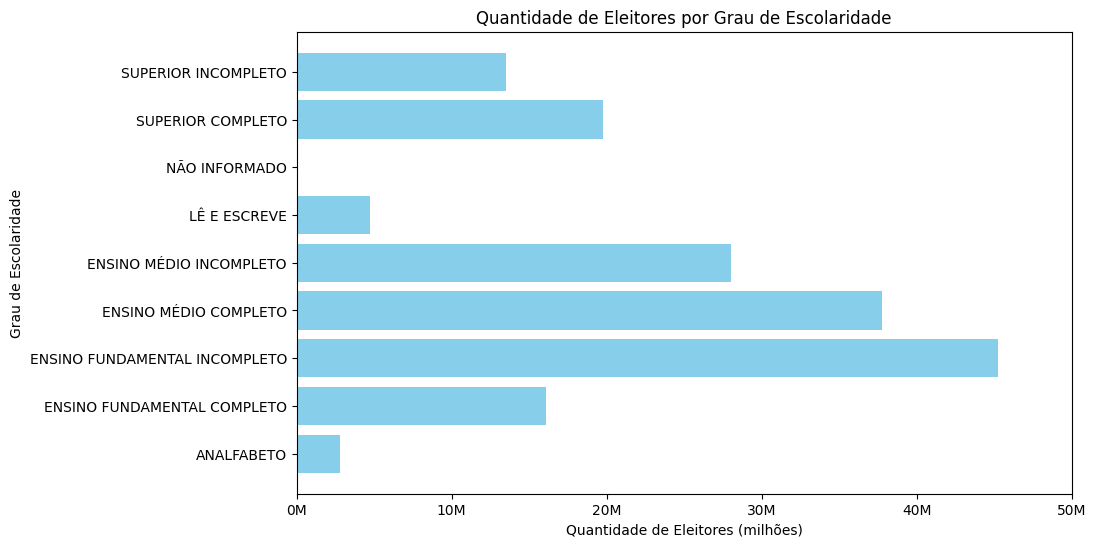

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(contagem_educacao['DS_GRAU_ESCOLARIDADE'], contagem_educacao['QT_ELEITORES_PERFIL'], color='skyblue')

plt.xlabel('Quantidade de Eleitores (milhões)')
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x/1e6)}M' for x in plt.xticks()[0]])  # Escala em milhões

plt.ylabel('Grau de Escolaridade')
plt.title('Quantidade de Eleitores por Grau de Escolaridade')

plt.show()


In [29]:
# Soma dos votos por cidade
votos_por_cidade = df.groupby('NM_MUNICIPIO')['QT_TOTAL_VOTOS'].sum()

cidade_menos_votos = votos_por_cidade.idxmin()
menor_votos = votos_por_cidade.min()

cidade_mais_votos = votos_por_cidade.idxmax()
maior_votos = votos_por_cidade.max()

print(f'Cidade com menos votos: {cidade_menos_votos} ({menor_votos} votos)')
print(f'Cidade com mais votos: {cidade_mais_votos} ({maior_votos} votos)')


Cidade com menos votos: ENGENHO VELHO (14688 votos)
Cidade com mais votos: PORTO ALEGRE (11921931 votos)


In [35]:
eleitores_superior = df[df['DS_GRAU_ESCOLARIDADE'] == 'SUPERIOR COMPLETO'].groupby('NM_MUNICIPIO')['QT_ELEITORES_PERFIL'].sum()

total_eleitores = df.groupby('NM_MUNICIPIO')['QT_ELEITORES_PERFIL'].sum()

percentual_superior = (eleitores_superior / total_eleitores) * 100

cidade_menor_percentual_superior = percentual_superior.idxmin()
menor_percentual = percentual_superior.min()

cidade_maior_percentual_superior = percentual_superior.idxmax()
maior_percentual = percentual_superior.max()

print(f'Cidade com menor percentual de eleitores com ensino superior completo: {cidade_menor_percentual_superior} ({menor_percentual:.2f}%)')

print(f'Cidade com maior percentual de eleitores com ensino superior completo: {cidade_maior_percentual_superior} ({maior_percentual:.2f}%)')

percentual_superior_porto_alegre = percentual_superior.loc['PORTO ALEGRE']

print(f'Percentual de eleitores com ensino superior completo em Porto Alegre: {percentual_superior_porto_alegre:.2f}%')

percentual_superior_df = percentual_superior.reset_index()
percentual_superior_df.columns = ['NM_MUNICIPIO', 'percentual_superior']

Cidade com menor percentual de eleitores com ensino superior completo: CANUDOS DO VALE (2.55%)
Cidade com maior percentual de eleitores com ensino superior completo: ERECHIM (17.99%)
Percentual de eleitores com ensino superior completo em Porto Alegre: 16.53%


In [48]:
eleitores_efi = df[df['DS_GRAU_ESCOLARIDADE'] == 'ENSINO FUNDAMENTAL INCOMPLETO'].groupby('NM_MUNICIPIO')['QT_ELEITORES_PERFIL'].sum()

percentual_efi = (eleitores_efi / total_eleitores) * 100

cidade_menor_percentual_efi = percentual_efi.idxmin()
menor_percentual_efi = percentual_efi.min()

cidade_maior_percentual_efi = percentual_efi.idxmax()
maior_percentual_efi = percentual_efi.max()

print(f'Cidade com menor percentual de eleitores com ensino fundamental incompleto: {cidade_menor_percentual_efi} ({menor_percentual_efi:.2f}%)')

print(f'Cidade com maior percentual de eleitores com ensino fundamental incompleto: {cidade_maior_percentual_efi} ({maior_percentual_efi:.2f}%)')

percentual_efi_df = percentual_efi.reset_index()
percentual_efi_df.columns = ['NM_MUNICIPIO', 'percentual_efi']

Cidade com menor percentual de eleitores com ensino fundamental incompleto: PORTO ALEGRE (19.06%)
Cidade com maior percentual de eleitores com ensino fundamental incompleto: ARROIO DO PADRE (59.44%)


In [49]:
df_municipios = pd.read_csv("latitude-longitude-cidades.csv", delimiter=";")

df_rs = df_municipios[df_municipios['uf'] == 'RS'].copy()

df_rs['municipio'] = df_rs['municipio'].str.upper()

df_rs[['municipio', 'latitude', 'longitude']].head()

,municipio,latitude,longitude
3935,ACEGUÁ,-31.866483,-54.161467
3936,AGUDO,-29.644743,-53.251458
3937,AJURICABA,-28.234170,-53.775668
3938,ALECRIM,-27.657856,-54.764849
3939,ALEGRETE,-29.790166,-55.794862


In [50]:
df_merged = pd.merge(df, df_rs, left_on='NM_MUNICIPIO', right_on='municipio', how='left')

df_merged_superior = pd.merge(df_merged, percentual_superior_df, on='NM_MUNICIPIO', how='left')

df_merged_efi = pd.merge(df_merged, percentual_efi_df, on='NM_MUNICIPIO', how='left')

df_merged_superior.head()


,CD_MUNICIPIO,NR_ZONA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,NM_PARTIDO,NM_MUNICIPIO,QT_TOTAL_VOTOS,id_municipio,uf,municipio,longitude,latitude,percentual_superior
0,84735,3,ANALFABETO,28,PROGRESSISTAS,ÁUREA,856,3922.0,RS,ÁUREA,-52.050506,-27.693586,6.352864
1,84735,3,ANALFABETO,28,Partido Liberal,ÁUREA,528,3922.0,RS,ÁUREA,-52.050506,-27.693586,6.352864
2,84735,3,ANALFABETO,28,REPUBLICANOS,ÁUREA,209,3922.0,RS,ÁUREA,-52.050506,-27.693586,6.352864
3,84735,3,ANALFABETO,28,Movimento Democrático Brasileiro,ÁUREA,345,3922.0,RS,ÁUREA,-52.050506,-27.693586,6.352864
4,84735,3,ANALFABETO,28,Partido Trabalhista Brasileiro,ÁUREA,484,3922.0,RS,ÁUREA,-52.050506,-27.693586,6.352864


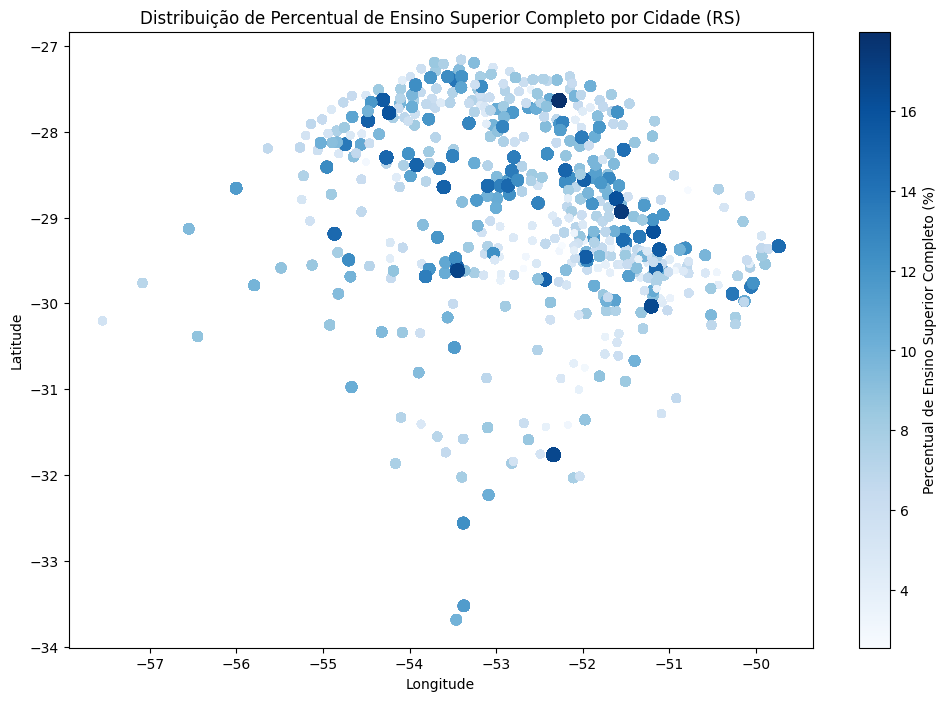

In [51]:
df_merged_filtrado = df_merged_superior[['NM_MUNICIPIO', 'longitude', 'latitude', 'percentual_superior']]

plt.figure(figsize=(12, 8))
plt.scatter(
    df_merged_filtrado['longitude'],
    df_merged_filtrado['latitude'],
    s=df_merged_filtrado['percentual_superior'] * 5,  
    c=df_merged_filtrado['percentual_superior'],
    cmap='Blues'
)

plt.title('Distribuição de Percentual de Ensino Superior Completo por Cidade (RS)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Percentual de Ensino Superior Completo (%)')

plt.show()


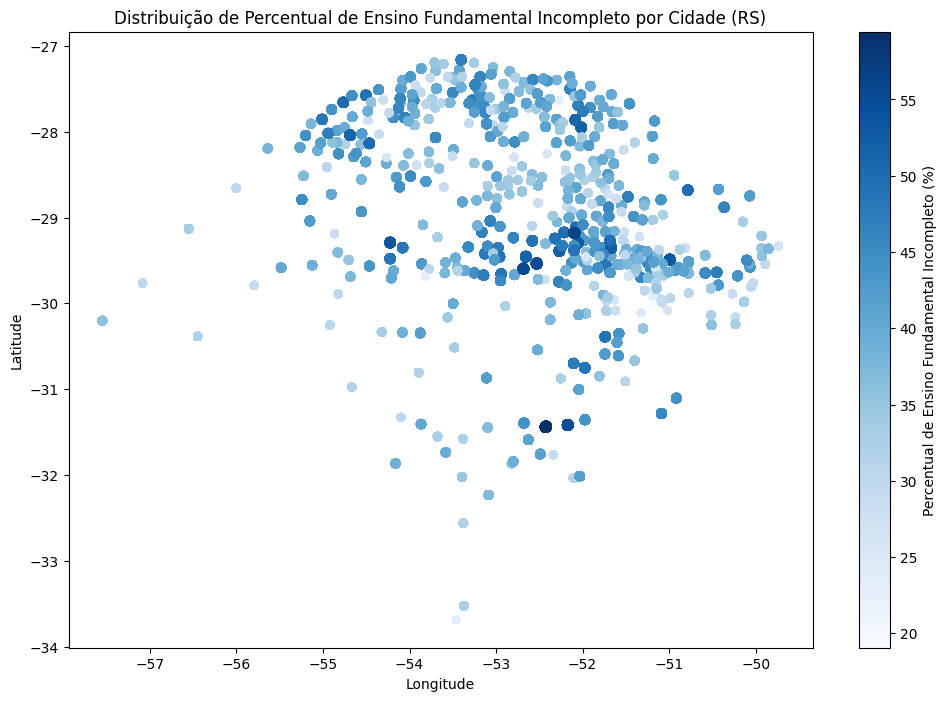

In [55]:
df_merged_filtrado = df_merged_efi[['NM_MUNICIPIO', 'longitude', 'latitude', 'percentual_efi']]

plt.figure(figsize=(12, 8))
plt.scatter(
    df_merged_filtrado['longitude'],
    df_merged_filtrado['latitude'],
    s=df_merged_filtrado['percentual_efi'],  
    c=df_merged_filtrado['percentual_efi'],
    cmap='Blues'
)

plt.title('Distribuição de Percentual de Ensino Fundamental Incompleto por Cidade (RS)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Percentual de Ensino Fundamental Incompleto (%)')

plt.show()
